<a href="https://colab.research.google.com/github/AshwinPrasanth/task/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation

In [ ]:
data=pd.read_csv("Iris.csv")
print("Data set preview")
data.head()

Data set preview


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

**DATA PREPROCESSING**

In [ ]:
data=data.drop("Id",axis=1)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Exploration**

In [ ]:
print("Datatype Info\n")
print(data.dtypes)

print("\nDataset dimension: ",data.shape)
print("\nMissing Value count:")
print(data.isnull().sum())

Datatype Info

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Dataset dimension:  (150, 5)

Missing Value count:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print("Dataset summary:\n")
print(data.describe())

Dataset summary:

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


**EDA**

Relationships Between Features



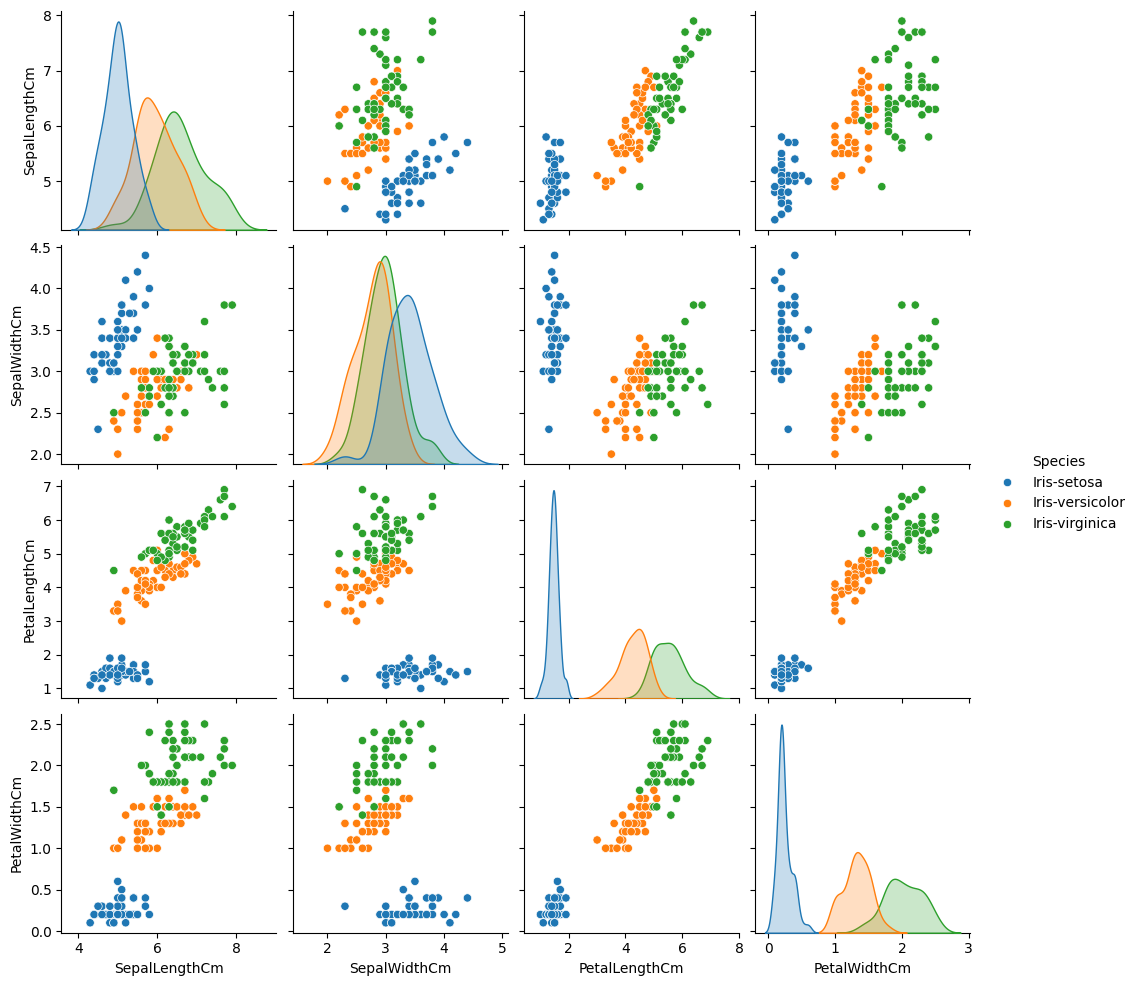

In [ ]:
print("Relationships Between Features\n")
sns.pairplot(data,hue='Species')
plt.show()

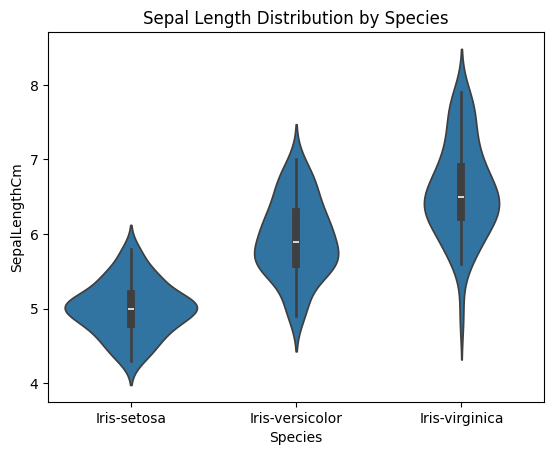

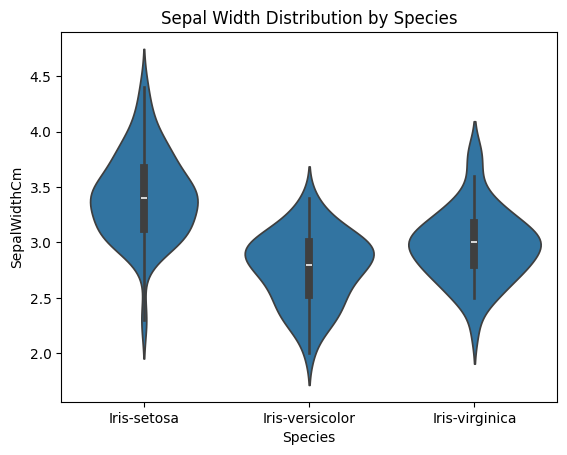

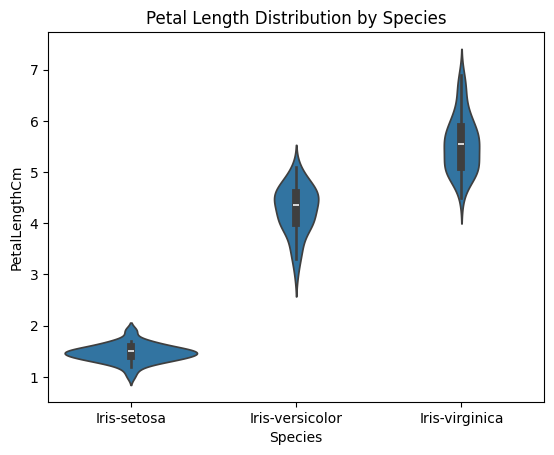

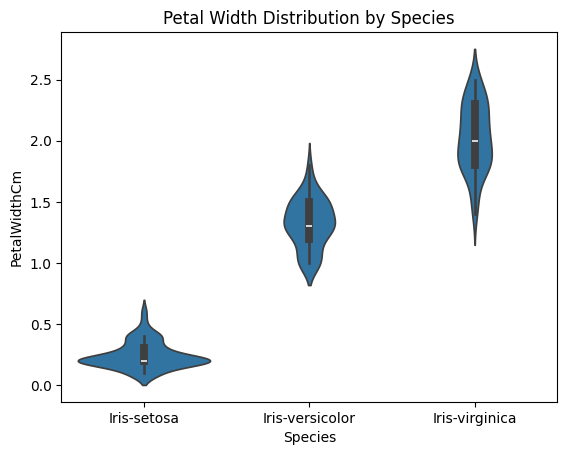

In [ ]:
sns.violinplot(x="Species", y="SepalLengthCm", data=data)
plt.title("Sepal Length Distribution by Species")
plt.show()
sns.violinplot(x="Species", y="SepalWidthCm", data=data)
plt.title("Sepal Width Distribution by Species")
plt.show()
sns.violinplot(x="Species", y="PetalLengthCm", data=data)
plt.title("Petal Length Distribution by Species")
plt.show()
sns.violinplot(x="Species", y="PetalWidthCm", data=data)
plt.title("Petal Width Distribution by Species")
plt.show()

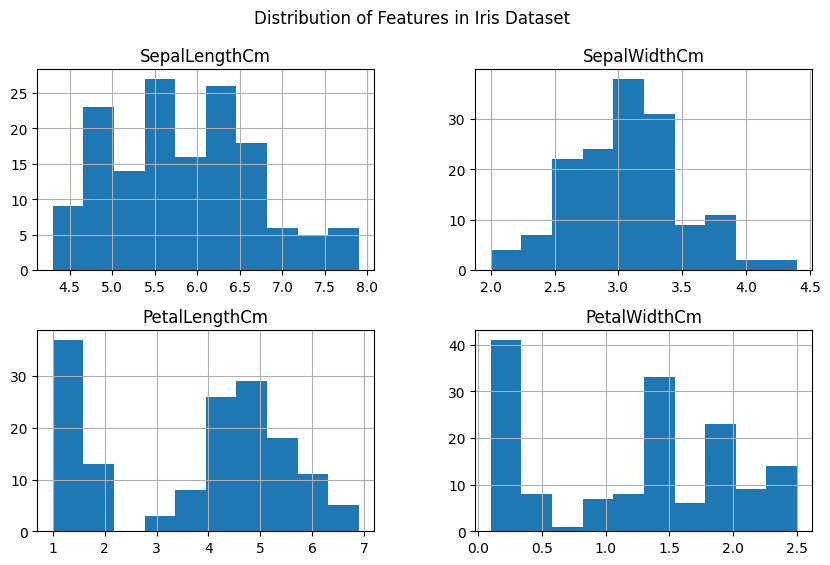

In [ ]:
data.hist(figsize=(10, 6))
plt.suptitle("Distribution of Features in Iris Dataset")
plt.show()

<ipython-input-13-9404ef3cf8c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data.corr()


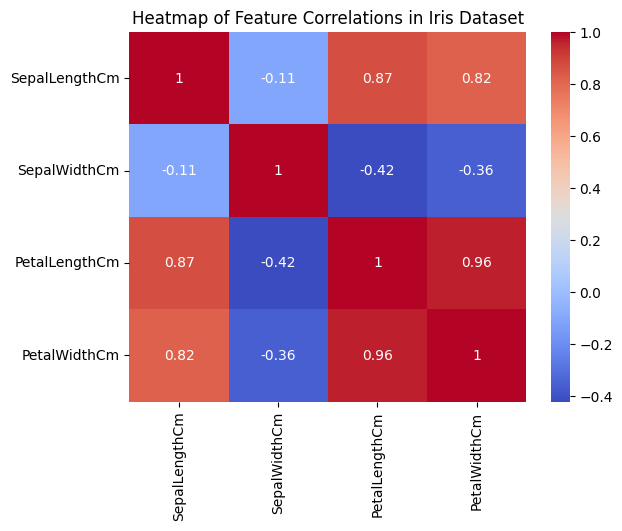

In [ ]:
corr= data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap of Feature Correlations in Iris Dataset")
plt.show()

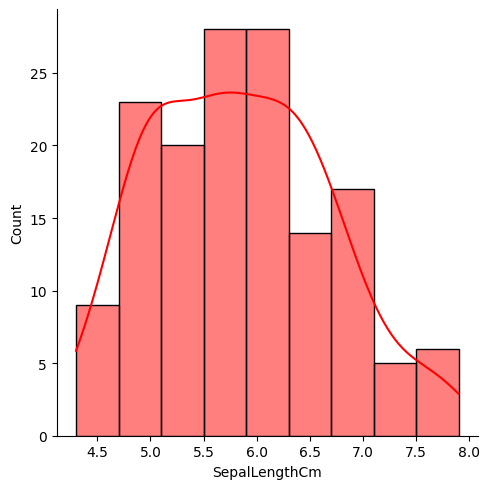

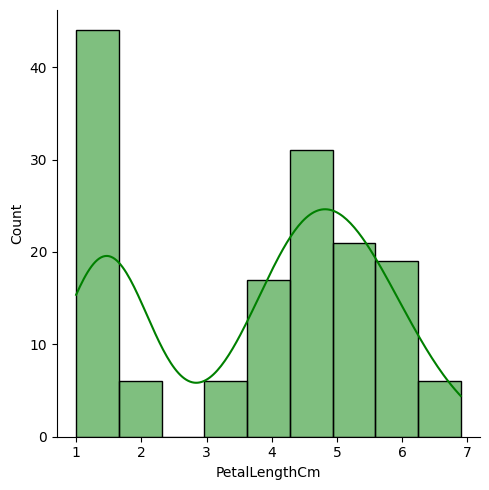

In [ ]:
sns.displot(data["SepalLengthCm"], kde=True, color="red")
sns.displot(data["PetalLengthCm"], kde=True, color="green")

In [ ]:
x=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [ ]:
print(x[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [ ]:
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=0)
print("Training Set: ",x_train.shape)
print("Testing Set: ",x_test.shape)

Training Set:  (120, 4)
Testing Set:  (30, 4)


**MACHINE LEARNING GAUSSIAN NB MODEL**

Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Training Accuracy:
 96.66666666666667

 Actual vs Predicted result:



Text(50.722222222222214, 0.5, 'Actual')

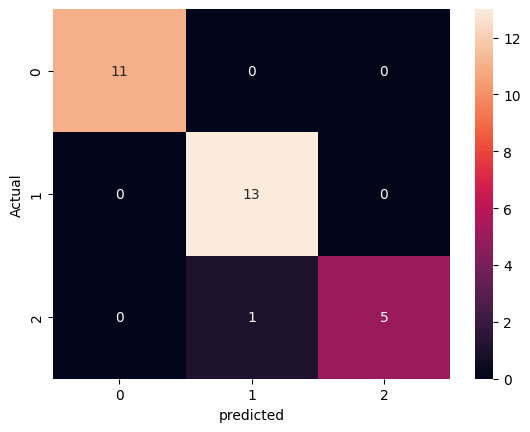

In [ ]:
naive=GaussianNB()
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nTraining Accuracy:\n",accuracy_score(y_test,y_pred)*100)
m=confusion_matrix(y_test,y_pred)
print("\n Actual vs Predicted result:\n")
sns.heatmap(m,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



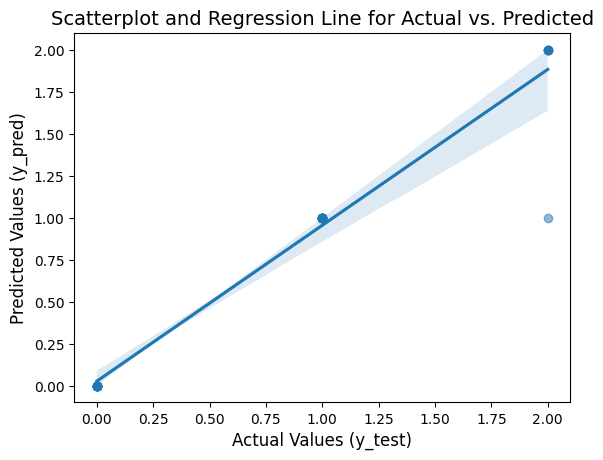

In [ ]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.5})
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.title("Scatterplot and Regression Line for Actual vs. Predicted", fontsize=14)

plt.xlim(min(y_test.min(), y_pred.min()) - 0.1, max(y_test.max(), y_pred.max()) + 0.1)
plt.ylim(min(y_test.min(), y_pred.min()) - 0.1, max(y_test.max(), y_pred.max()) + 0.1)

plt.show()

In [ ]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=0)

**DEEP LEARNING USING TENSORFLOW**

In [ ]:
model_tf = Sequential([
   Dense(10, activation='relu'),  # Input layer with 4 features
   Dense(10, activation='relu'),
   Dense(3, activation='softmax')  # Output layer with 3 classes
])


In [ ]:
model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_tf.fit(x_train, y_train,batch_size=30, epochs=30)

Epoch 1/30
4/4 [==============================] - 4s 11ms/step - loss: 0.0862 - accuracy: 0.9667
Epoch 2/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0820 - accuracy: 0.9750
Epoch 3/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0812 - accuracy: 0.9750
Epoch 4/30
4/4 [==============================] - 0s 22ms/step - loss: 0.0821 - accuracy: 0.9750
Epoch 5/30
4/4 [==============================] - 0s 13ms/step - loss: 0.0814 - accuracy: 0.9750
Epoch 6/30
4/4 [==============================] - 0s 13ms/step - loss: 0.0812 - accuracy: 0.9750
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.0801 - accuracy: 0.9750
Epoch 8/30
4/4 [==============================] - 0s 11ms/step - loss: 0.0801 - accuracy: 0.9833
Epoch 9/30
4/4 [==============================] - 0s 9ms/step - loss: 0.0802 - accuracy: 0.9833
Epoch 10/30
4/4 [==============================] - 0s 9ms/step - loss: 0.0798 - accuracy: 0.9833
Epoch 11/30
4/4 [==============

In [ ]:
y_pred=model_tf.predict(x_test)

1/1 [==============================] - 0s 181ms/step


**MODEL** **EVALUATION**

In [ ]:
loss, accuracy = model_tf.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.041960954666137695
Test accuracy: 1.0


In [ ]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print("Actual:\n",actual)
print("Predicted:\n",predicted)

Actual:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Predicted:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
